# Análisis Predictivo con Python

El **análisis predictivo** es una rama de la analítica avanzada que utiliza técnicas estadísticas, algoritmos de aprendizaje automático y modelos matemáticos para predecir eventos o resultados futuros en función de datos históricos.

---

## ¿Qué es el Análisis Predictivo?

El **análisis predictivo** consiste en construir modelos que puedan identificar patrones ocultos en los datos y utilizar esos patrones para **estimar resultados futuros**. A diferencia del análisis descriptivo (que resume lo que ya ha ocurrido), el análisis predictivo se enfoca en **qué es probable que suceda**.

---

## Objetivos del Análisis Predictivo

- Prever comportamientos futuros con base en datos pasados.
- Anticipar riesgos y oportunidades.
- Mejorar la toma de decisiones mediante predicciones cuantificables.
- Optimizar recursos, procesos y resultados en distintos dominios (negocios, salud, finanzas, etc.).

---

## Principales técnicas utilizadas

| Técnica                       | Descripción breve                                                               |
|------------------------------|----------------------------------------------------------------------------------|
| Regresión lineal/múltiple    | Modela la relación entre una variable dependiente continua y variables independientes. |
| Árboles de decisión          | Estructura jerárquica que toma decisiones basadas en condiciones.               |
| Bosques aleatorios (Random Forest) | Ensamble de árboles que mejora precisión y generalización.                   |
| Máquinas de soporte vectorial (SVM) | Encuentra el hiperplano óptimo para clasificación o regresión.              |
| Redes neuronales             | Modelos inspirados en el cerebro humano, capaces de capturar relaciones no lineales. |
| k-Vecinos más cercanos (k-NN)| Predice en función de los vecinos más cercanos en el espacio de características. |

---

## Etapas del Proceso Predictivo

1. **Definición del problema**  
   - Clarificar la variable objetivo y el valor del negocio que se busca predecir.

2. **Recolección y preparación de datos**  
   - Limpieza, transformación, codificación y normalización de datos.

3. **Selección del modelo**  
   - Escoger el algoritmo más adecuado según el tipo de problema (clasificación, regresión).

4. **Entrenamiento del modelo**  
   - Ajustar los parámetros del modelo usando datos históricos etiquetados.

5. **Evaluación del modelo**  
   - Utilizar métricas para comprobar la precisión y generalización.

6. **Implementación y monitoreo**  
   - Integrar el modelo en un sistema productivo y hacer seguimiento de su desempeño en el tiempo.

---

## Métricas comunes de evaluación

| Tipo de modelo     | Métricas principales                                         |
|--------------------|-------------------------------------------------------------|
| **Regresión**      | MAE, MAPE, MSE, RMSE, R²                                           |
| **Clasificación**  | Accuracy, Precision, Recall, F1-score, AUC-ROC               |

---

## Consideraciones técnicas

- **Sobreajuste (overfitting):** modelo que memoriza datos en lugar de generalizar.
- **Subajuste (underfitting):** modelo demasiado simple para captar patrones reales.
- **Interpretabilidad:** importante para justificar decisiones basadas en el modelo.
- **Sesgo y equidad:** evitar reproducir discriminación en los datos históricos.

---

## Diferencias con el Análisis Descriptivo

| Característica          | Análisis Descriptivo                   | Análisis Predictivo                         |
|-------------------------|----------------------------------------|---------------------------------------------|
| Enfoque                 | ¿Qué ocurrió?                          | ¿Qué ocurrirá?                              |
| Temporalidad            | Histórica                              | Futura                                       |
| Técnicas utilizadas     | Estadística descriptiva, visualización | Modelos estadísticos, ML, algoritmos        |
| Tipo de datos           | Observados                             | Observados + proyectados                    |
| Aplicación              | Reportes, diagnóstico                  | Predicción, simulación, toma de decisiones  |

---

## Conclusión

El **análisis predictivo** es una herramienta poderosa en el ámbito de la ciencia de datos y la inteligencia de negocios. Permite anticiparse a comportamientos futuros con base en datos pasados, brindando una ventaja estratégica a organizaciones e investigadores. Su correcta implementación requiere tanto **conocimiento técnico** como **criterio analítico** para garantizar modelos precisos, útiles y éticos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sa

In [2]:
df_ss = pd.read_csv(r'global_superstore.csv',encoding='latin')

In [4]:
# Create the dim_customer dataframe
#dim_customer = pd.DataFrame(columns = ["Customer_ID","Customer_Name","Segment"])

dim_customer = pd.DataFrame({
    "Customer_ID": [],
    "Customer_Name": [],
    "Segment": []
})

# Create the dim_product dataframe
dim_product = pd.DataFrame({
    "Product_ID": [],
    "Product_ID2": [],
    "Product_Name": [],
    "Category": [],
    "Sub_Category": []
})

# Create the dim_location dataframe
dim_location = pd.DataFrame({
    "Location_ID": [],
    "City": [],
    "State": [],
    "Country": [],
    "Region": []
})

# Create the dim_date dataframe
dim_date = pd.DataFrame({
    "Date_ID": [],
    "Dates": [],
    "Years": [],
    "Months": [],
    "Days": [],
    "Trimester": []
})

# Create the fact_sales dataframe
fact_sales = pd.DataFrame({
    "Row_ID": [],
    "Order_ID": [],
    "Order_Date": [],
    "Ship_Date": [],
    "Customer_ID": [],
    "Product_ID": [],
    "Location_ID": [],
    "Sales": [],
    "Quantity": [],
    "Discount":[],
    "Profit":[],
    "Shipping_Cost":[],
    "Order_Priority": []
})

In [5]:
query_c = df_ss[['Customer ID', 'Customer Name','Segment']].drop_duplicates()

In [6]:
dim_customer['Customer_ID'] = query_c['Customer ID']

In [7]:
dim_customer['Customer_ID'] = query_c['Customer ID']
dim_customer['Customer_Name'] = query_c['Customer Name']
dim_customer['Segment'] = query_c['Segment']
dim_customer = dim_customer.reset_index(drop=True)

In [ ]:
import sqlalchemy

# Crear engine para SQLite
nombre_bd = 'bi_db.sqlite'  # Nombre del archivo de base de datos SQLite
engine = sqlalchemy.create_engine(f'sqlite:///{nombre_bd}')
connection = engine.connect()

# Subir los datos a la base de datos SQLite
dim_customer.to_sql('dim_customer', con=connection, if_exists='append', index=False)
dim_product.to_sql('dim_product', con=connection, if_exists='append', index=False)
dim_location.to_sql('dim_location', con=connection, if_exists='append', index=False)
dim_date.to_sql('dim_date', con=connection, if_exists='append', index=False)
fact_sales.to_sql('fact_sales', con=connection, if_exists='append', index=False)

In [8]:
query_p = df_ss[['Product ID', 'Product Name','Category','Sub-Category']].drop_duplicates()
dim_product['Product_ID2'] = query_p['Product ID']
dim_product['Product_Name'] = query_p['Product Name']
dim_product['Category'] = query_p['Category']
dim_product['Sub_Category'] = query_p['Sub-Category']
dim_product['Product_ID'] = range(1,dim_product.shape[0]+1) #IDENTITY
dim_product = dim_product.reset_index(drop=True)

In [9]:
query_l = df_ss[['City', 'State','Country','Region']].drop_duplicates()
dim_location['City'] = query_l['City']
dim_location['State'] = query_l['State']
dim_location['Country'] = query_l['Country']
dim_location['Region'] = query_l['Region']
dim_location['Location_ID'] = range(1,dim_location.shape[0]+1)
dim_location = dim_location.reset_index(drop=True)
dim_location

,Location_ID,City,State,Country,Region
0,1,New York City,New York,United States,East
1,2,Wollongong,New South Wales,Australia,Oceania
2,3,Brisbane,Queensland,Australia,Oceania
3,4,Berlin,Berlin,Germany,Central
4,5,Dakar,Dakar,Senegal,Africa
...,...,...,...,...,...
3814,3815,San Luis Obispo,California,United States,West
3815,3816,Abilene,Texas,United States,Central
3816,3817,Felahiye,Kayseri,Turkey,EMEA
3817,3818,Lewiston,Idaho,United States,West


In [10]:
query_d = pd.concat([df_ss['Order Date'],df_ss['Ship Date']]).drop_duplicates()
dim_date['Dates'] = query_d
dim_date['Years'] = query_d.dt.year
dim_date['Months'] = query_d.dt.month
dim_date['Days'] = query_d.dt.day
dim_date['Trimester'] = np.where(query_d.dt.month<=3, 'T1',
                                 (np.where(query_d.dt.month<=6, 'T2',
                                           np.where(query_d.dt.month<=9,'T3','T4'))))
dim_date['Date_ID'] = range(1,dim_date.shape[0]+1)
dim_date

,Date_ID,Dates,Years,Months,Days,Trimester
0,1,2012-07-31,2012,7,31,T3
1,2,2013-02-05,2013,2,5,T1
2,3,2013-10-17,2013,10,17,T4
3,4,2013-01-28,2013,1,28,T1
4,5,2013-11-05,2013,11,5,T4
...,...,...,...,...,...,...
10922,1464,2011-07-10,2011,7,10,T3
11823,1465,2011-03-20,2011,3,20,T1
14007,1466,2015-01-06,2015,1,6,T1
16778,1467,2015-01-07,2015,1,7,T1


In [11]:
df_ss.merge(dim_product,how='inner', left_on=['Product ID','Product Name'], right_on=['Product_ID2','Product_Name'],suffixes=('ss', 'p')
           ).merge(dim_location,left_on=['City','State','Country','Region'], right_on=['City','State','Country','Region'],suffixes=('ss1', 'l')
                  )

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Product_ID,Product_ID2,Product_Name,Categoryp,Sub_Category,Location_ID
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,1,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,1
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2,FUR-CH-10003950,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,3,TEC-PH-10004664,"Nokia Smart Phone, with Caller ID",Technology,Phones,3
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,4,TEC-PH-10004583,"Motorola Smart Phone, Cordless",Technology,Phones,4
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.04,Critical,5,TEC-SHA-10000501,"Sharp Wireless Fax, High-Speed",Technology,Copiers,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,0.0,4.5000,0.01,Medium,5302,OFF-FA-10000746,"Advantus Thumb Tacks, 12 Pack",Office Supplies,Fasteners,862
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,0.8,-1.1100,0.01,Medium,10682,OFF-AP-10002906,Hoover Replacement Belt for Commercial Guardsm...,Office Supplies,Appliances,131
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,0.0,11.2308,0.01,High,9459,OFF-EN-10001219,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",Office Supplies,Envelopes,1861
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,So Paulo,...,0.0,2.4000,0.00,Medium,7197,OFF-BI-10000806,"Acco Index Tab, Economy",Office Supplies,Binders,1351


In [12]:
query_ft = df_ss.merge(dim_product,how='inner', left_on=['Product ID','Product Name'], right_on=['Product_ID2','Product_Name'],suffixes=('ss', 'p')
           ).merge(dim_location,left_on=['City','State','Country','Region'], right_on=['City','State','Country','Region'],suffixes=('ss1', 'l')
                  ).merge(dim_date,left_on=['Order Date'],right_on=['Dates'],suffixes=('ss2', 'd')
                         ).merge(dim_date,left_on=['Ship Date'],right_on=['Dates'],suffixes=('ss3', 'd2'))

In [13]:
fact_sales["Row_ID"]= query_ft['Row ID']
fact_sales["Order_ID"]= query_ft['Order ID']
fact_sales["Order_Date"]= query_ft['Date_IDss3']
fact_sales["Ship_Date"]= query_ft['Date_IDd2']
fact_sales["Customer_ID"]= query_ft['Customer ID']
fact_sales["Product_ID"]= query_ft['Product_ID']
fact_sales["Location_ID"]= query_ft['Location_ID']
fact_sales["Sales"]= query_ft['Sales']
fact_sales["Quantity"]= query_ft['Quantity']
fact_sales["Discount"]= query_ft['Discount']
fact_sales["Profit"]= query_ft['Profit']
fact_sales["Shipping_Cost"]= query_ft['Shipping Cost']
fact_sales["Order_Priority"]=query_ft['Order Priority']
fact_sales.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Customer_ID,Product_ID,Location_ID,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,32298,CA-2012-124891,1,1,RH-19495,1,1,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2,943,JR-16210,2,2,3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,3,429,CR-12730,3,3,5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,4,999,KM-16375,4,4,2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5,936,RH-9495,5,5,2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
import sqlalchemy

# Crear engine para SQLite
nombre_bd = 'bi_db.sqlite'  # Nombre del archivo de base de datos SQLite
engine = sqlalchemy.create_engine(f'sqlite:///{nombre_bd}')
connection = engine.connect()

# Subir los datos a la base de datos SQLite
dim_customer.to_sql('dim_customer', con=connection, if_exists='append', index=False)
dim_product.to_sql('dim_product', con=connection, if_exists='append', index=False)
dim_location.to_sql('dim_location', con=connection, if_exists='append', index=False)
dim_date.to_sql('dim_date', con=connection, if_exists='append', index=False)
fact_sales.to_sql('fact_sales', con=connection, if_exists='append', index=False)

51290

In [15]:
ft_sales = pd.read_sql("SELECT * FROM fact_sales", engine)
dim_date = pd.read_sql("SELECT * FROM dim_date", engine)
dim_customer = pd.read_sql("SELECT * FROM dim_customer", engine)
dim_product = pd.read_sql("SELECT * FROM dim_product", engine)
dim_location = pd.read_sql("SELECT * FROM dim_location", engine)

### 1. Definición del problema
Predecir las ventas para los siguientes 7 días

### 2. Recolección y preparación de datos

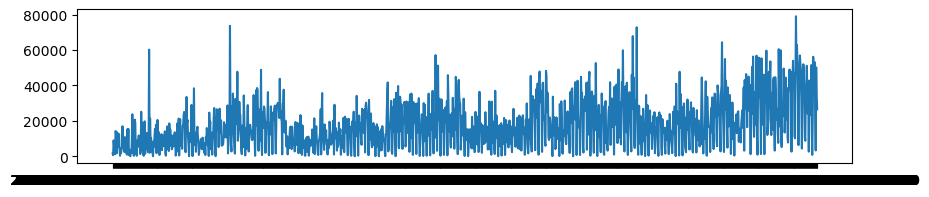

In [16]:
query = ft_sales.groupby('Order_Date',as_index=False).sum(
        ).merge(dim_date,how='inner',left_on=['Order_Date'],right_on=['Date_ID'],suffixes=['ft','d']
        ).sort_values('Dates')
plt.figure(figsize=(10,2))
plt.plot(query['Dates'],query['Sales'])
#plt.plot(query['Dates'],query['Profit'])
#plt.plot(query['Dates'],query['Shipping_Cost'])
plt.show()

In [17]:
data = query[['Dates','Sales','Profit','Shipping_Cost']].reset_index(drop=True)

In [18]:
ts_sales = data['Sales']
mvts_sales = data[['Sales','Profit','Shipping_Cost']]
ts_dates = data['Dates']

#### Normalizar, scaling

In [19]:
from sklearn import preprocessing

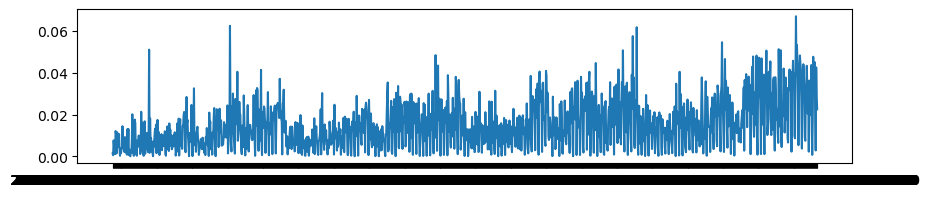

In [20]:
norm_ts = preprocessing.normalize([ts_sales])
plt.figure(figsize=(10,2))
plt.plot(query['Dates'],norm_ts[0])
plt.show()

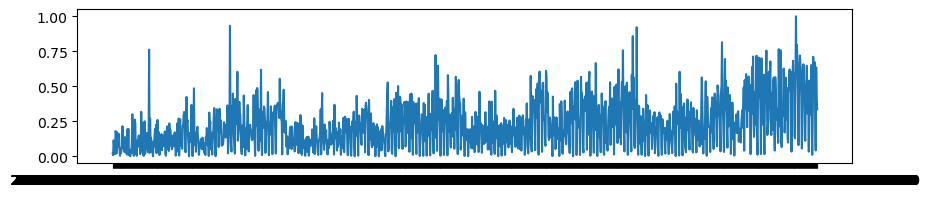

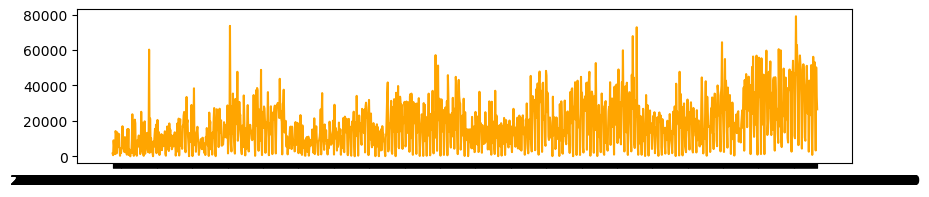

In [21]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(np.array([ts_sales]).T)
plt.figure(figsize=(10,2))
plt.plot(query['Dates'],X)
plt.show()
plt.figure(figsize=(10,2))
plt.plot(query['Dates'],scaler.inverse_transform(X),color='orange')
plt.show()

In [22]:
train_lim = int(len(X)*0.85)
test_lim = int(len(X)*0.95)
train = X[:train_lim].ravel()
test = X[train_lim:test_lim].ravel()
valid = X[test_lim:].ravel()
print(f'Train size: {len(train)}\nTest size: {len(test)}\nValidation size: {len(valid)}')

Train size: 2431
Test size: 286
Validation size: 143


### 3. Selección del modelo

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
'''
be=float('inf')
for p in range(4):
    for d in range(2):
        for q in range(4):
            SARIMAXmodel = SARIMAX(train, order = (p, d, q), seasonal_order=(2,2,0,12))
            SARIMAXmodel = SARIMAXmodel.fit(disp=0)
            y_pred = SARIMAXmodel.forecast(len(test))
            mape_error = mape(test,y_pred)
            if mape_error<be:
                a,b,c = p,d,q
                be = mape_error
            print(p,d,q, mape_error)
print(a,b,c,be)
'''

"\nbe=float('inf')\nfor p in range(4):\n    for d in range(2):\n        for q in range(4):\n            SARIMAXmodel = SARIMAX(train, order = (p, d, q), seasonal_order=(2,2,0,12))\n            SARIMAXmodel = SARIMAXmodel.fit(disp=0)\n            y_pred = SARIMAXmodel.forecast(len(test))\n            mape_error = mape(test,y_pred)\n            if mape_error<be:\n                a,b,c = p,d,q\n                be = mape_error\n            print(p,d,q, mape_error)\nprint(a,b,c,be)\n"

### 4. Entrenamiento del modelo

In [25]:
#Train the model
SARIMAXmodel = SARIMAX(train, order = (0, 1, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit(disp=0)

c:\Users\cmoncada\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


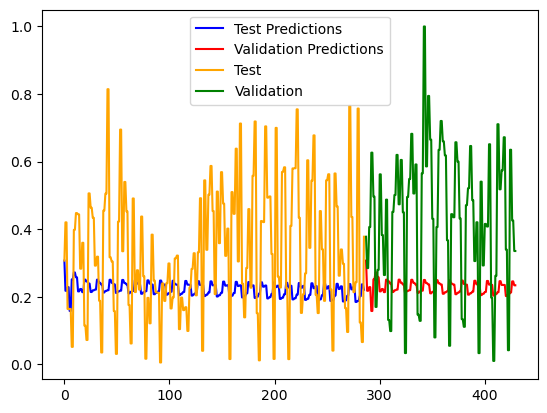

In [26]:
y_test = SARIMAXmodel.forecast(len(test))
y_valid = SARIMAXmodel.forecast(len(valid)) 
plt.plot(y_test, color='Blue', label = 'Test Predictions')
plt.plot(range(len(y_test)+1,len(y_test)+1+len(y_valid)),y_valid, color='Red', label = 'Validation Predictions')
plt.plot(test, color='Orange', label = 'Test')
plt.plot(range(len(y_test)+1,len(y_test)+1+len(y_valid)),valid, color='Green', label = 'Validation')
plt.legend()

### 5. Evaluación del modelo

In [27]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [28]:
test_mape = mape(test,y_test)
test_mse = mse(test,y_test)
test_r2 = r2_score(test,y_test)
valid_mape = mape(valid,y_valid)
valid_mse = mse(valid,y_valid)
valid_r2 = r2_score(valid,y_valid)
print(f'Testing errors MAPE: {test_mape} MSE: {test_mse} R2:{test_r2}')
print(f'Validation errors MAPE: {valid_mape} MSE: {valid_mse} R2:{valid_r2}')

Testing errors MAPE: 1.398706786651796 MSE: 0.050455502541868896 R2:-0.36779410653245526
Validation errors MAPE: 1.0672396981910433 MSE: 0.08719328007155554 R2:-0.9608177434645744


### 6. Predicciones a futuro

In [29]:
prediction_table = pd.DataFrame(columns=['Date','Value'])

import datetime

preds = 7


prediction_table['Date'] = [datetime.datetime(2015, 1, i) for i in range(1,preds+1)]
prediction_table['Value'] = scaler.inverse_transform([SARIMAXmodel.forecast(len(test)+len(valid)+preds)[-preds:]])[0]
print(prediction_table)

        Date         Value
0 2015-01-01  16245.242185
1 2015-01-02  16245.242185
2 2015-01-03  17627.371193
3 2015-01-04  17627.370732
4 2015-01-05  12913.260757
5 2015-01-06  12913.260757
6 2015-01-07  13070.028633


## Modelo 2
### 2. Recolección y preparación de datos

In [30]:
t=7

# Converting to numpy ndarrays
timesteps =t+1

train_matrix=np.array([[j for j in train[i:i+timesteps]] for i in range(0,len(train)-timesteps+1)])
print(train_matrix.shape)

test_matrix=np.array([[j for j in test[i:i+timesteps]] for i in range(0,len(test)-timesteps+1)])
print(test_matrix.shape)

valid_matrix=np.array([[j for j in valid[i:i+timesteps]] for i in range(0,len(valid)-timesteps+1)])
print(valid_matrix.shape)

(2424, 8)
(279, 8)
(136, 8)


In [31]:
x_train, y_train = train_matrix[:,:timesteps-1],train_matrix[:,[timesteps-1]]
x_test, y_test = test_matrix[:,:timesteps-1],test_matrix[:,[timesteps-1]]
x_valid, y_valid = valid_matrix[:,:timesteps-1],valid_matrix[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(2424, 7) (2424, 1)
(279, 7) (279, 1)
(136, 7) (136, 1)


### 3. Selección del modelo

In [32]:
from sklearn.svm import SVR

### 4. Entrenamiento del modelo

In [33]:
SVRmodel = SVR(kernel='poly', degree=2, C=3, coef0=0.1, epsilon=0.01, gamma=1,
                max_iter=100000000, cache_size=200, shrinking=True, tol=0.001, verbose=False)

SVRmodel.fit(x_train, y_train[:,0])

SVR(C=3, coef0=0.1, degree=2, epsilon=0.01, gamma=1, kernel='poly',
    max_iter=100000000)

In [34]:
y_train_pred = SVRmodel.predict(x_train).ravel()
y_test_pred = SVRmodel.predict(x_test).ravel()
y_valid_pred = SVRmodel.predict(x_valid).ravel()

### 5. Evaluación del modelo

In [35]:
test_mape = mape(y_test_pred,y_test)
test_mse = mse(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)
valid_mape = mape(y_valid,y_valid_pred)
valid_mse = mse(y_valid,y_valid_pred)
valid_r2 = r2_score(y_valid,y_valid_pred)
print(f'Testing errors MAPE: {test_mape} MSE: {test_mse} R2:{test_r2}')
print(f'Validation errors MAPE: {valid_mape} MSE: {valid_mse} R2:{valid_r2}')

Testing errors MAPE: 0.33972135168541556 MSE: 0.022388132795688628 R2:0.4003626830752749
Validation errors MAPE: 0.7510466460810586 MSE: 0.02724245138788326 R2:0.40583988850521246


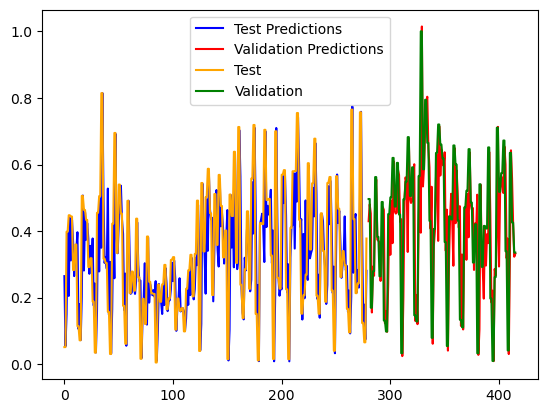

In [36]:
plt.plot(y_test_pred, color='Blue', label = 'Test Predictions')
plt.plot(range(len(y_test_pred)+1,len(y_test_pred)+1+len(y_valid_pred)),y_valid_pred, color='Red', label = 'Validation Predictions')
plt.plot(y_test, color='Orange', label = 'Test')
plt.plot(range(len(y_test_pred)+1,len(y_test_pred)+1+len(y_valid_pred)),y_valid, color='Green', label = 'Validation')
plt.legend()

# ¿Dónde almacenar las predicciones en un Data Warehouse?

No hay una “tabla universal” para guardar los resultados de un modelo; la decisión depende del **grano** (nivel de detalle) y del **uso analítico**.  
A continuación se resumen las estrategias más habituales.

| Estrategia | ¿Cuándo conviene? | Implementación típica |
|------------|------------------|-----------------------|
| **Nueva tabla de hechos (“Fact_Forecast”)** | • El pronóstico tiene **igual granularidad** que los hechos reales (p. ej. ventas diaria × producto × sucursal).<br>• Necesitas comparar fácilmente *Real vs. Forecast*. | • Crear tabla de hechos paralela.<br>• Mismas claves foráneas a las dimensiones (Tiempo, Producto, Región…).<br>• Medidas: `Monto_Pronosticado`, `Unidades_Pronosticadas`, error, IC, etc.<br>• Añadir atributo de **Escenario** (Real, Forecast, Budget…). |
| **Añadir columnas en la tabla de hechos existente** | • El modelo genera un score **por cada registro existente** (ej. probabilidad de churn por cliente).<br>• No se requieren nuevas filas. | • Campos adicionales: `Prob_Churn`, `Score_Riesgo`, `Fecha_Scoring`, `Version_Modelo`.<br>• Útil para modelos de clasificación/regresión “por instancia”. |
| **Tabla intermedia de resultados (“Analytic_Output / Scores”)** | • El resultado **no coincide exactamente** con el grano del hecho principal o deseas histórico de ejecuciones.<br>• Quieres alojar **varios modelos** con distinta frecuencia. | • Tabla con claves de negocio + `ID_Ejecución`, timestamp y métricas predichas.<br>• Permite conservar la evolución de cada modelo y comparar versiones. |
| **Data Mart o vista externa** | • El pronóstico solo se usa en reporting y no tiene que residir en el DW corporativo.<br>• Prefieres aislar el ciclo de vida del modelo. | • Cargar en un **data mart temático** (“Forecast_Mart”).<br>• Exponer mediante vistas/cubos (SSAS, Power BI, etc.). |

## Buenas prácticas

1. **Define el grano** del pronóstico antes de decidir la estrategia.  
2. **Trazabilidad**: guarda fecha, versión de modelo y parámetros clave.  
3. Usa un **atributo de escenario** para diferenciar Real / Forecast / Budget.  
4. **Historicidad**: evita sobrescribir; inserta nuevas filas o usa `ID_Ejecución`.  
5. **Rendimiento**: tablas separadas facilitan particionado y mantenimiento.

**Resumen**: la opción más común es una **tabla de hechos de pronóstico paralela** (o un Data Mart dedicado) con las mismas dimensiones que los datos reales, lo que permite comparar fácilmente los resultados con la realidad y mantener la trazabilidad de los modelos.


In [37]:
model_table = pd.DataFrame(columns=['Model_ID','Algorithm','Params','mape','mse','r2','Date'])
prediction_table = pd.DataFrame(columns=['Date','Value'])

import datetime

preds = 7


prediction_table['Date'] = [datetime.datetime(2015, 1, i) for i in range(1,preds+1)]
prediction_table['Value'] = scaler.inverse_transform([SARIMAXmodel.forecast(len(test)+len(valid)+preds)[-preds:]])[0]
print(prediction_table)

        Date         Value
0 2015-01-01  16245.242185
1 2015-01-02  16245.242185
2 2015-01-03  17627.371193
3 2015-01-04  17627.370732
4 2015-01-05  12913.260757
5 2015-01-06  12913.260757
6 2015-01-07  13070.028633


### Mejora modelo SARIMAX

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos
#data = pd.read_csv('tus_datos.csv', parse_dates=['fecha'], index_col='fecha')

# Asegúrate de que tus datos estén ordenados por fecha
#data = data.sort_index()

# Separar la variable dependiente (endog) y las variables exógenas (exog)
#endog = data['variable_dependiente']
#exog = data[['variable_exogena1', 'variable_exogena2']]  # Ajusta según tus variables exógenas

In [39]:
# Definir el modelo SARIMAX
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Ajustar el modelo
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2431
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1852.020
Date:                            Fri, 25 Apr 2025   AIC                          -3694.040
Time:                                    12:16:32   BIC                          -3665.087
Sample:                                         0   HQIC                         -3683.511
                                           - 2431                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5527      0.014     40.203      0.000       0.526       0.580
ma.L1         -0.9828      0.004   

In [ ]:
# Realizar predicciones
pred = results.get_forecast(steps=12, y_test=y_test[-12:])  # Ajusta el número de pasos y las variables exógenas según tus necesidades
pred_ci = pred.conf_int()

In [41]:
from sklearn.metrics import mean_absolute_percentage_error

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test[-12:], pred.predicted_mean)
print(f'MAPE: {mape}')

MAPE: 0.8167605293738115


Anteriormente el valor era de 1.39 en el conjunto de test.

In [42]:
from sklearn.metrics import mean_absolute_percentage_error

# Calcular MAPE
mape = mean_absolute_percentage_error(y_valid[-12:], pred.predicted_mean)
print(f'MAPE: {mape}')

MAPE: 1.0916258920194486


### Mejora del modelo SVR

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [44]:
# Definir el modelo SVR
svr = SVR(kernel='rbf')

# Ajustar el modelo
svr.fit(x_train, y_train)


c:\Users\cmoncada\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [46]:
# Realizar predicciones
y_pred_scaled = svr.predict(x_test)

# Invertir el escalado de las predicciones
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


In [47]:
# Realizar predicciones
y_pred_scaled = svr.predict(x_test)

# Invertir el escalado de las predicciones
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()


In [48]:
# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


MAPE: 106951.7068474563
